In [1]:
from graph_patrol_env import GraphPatrolEnv
from patrolling_zoo.env.patrol_graph import PatrolGraph

from time import sleep
from IPython.display import clear_output
from time import  sleep

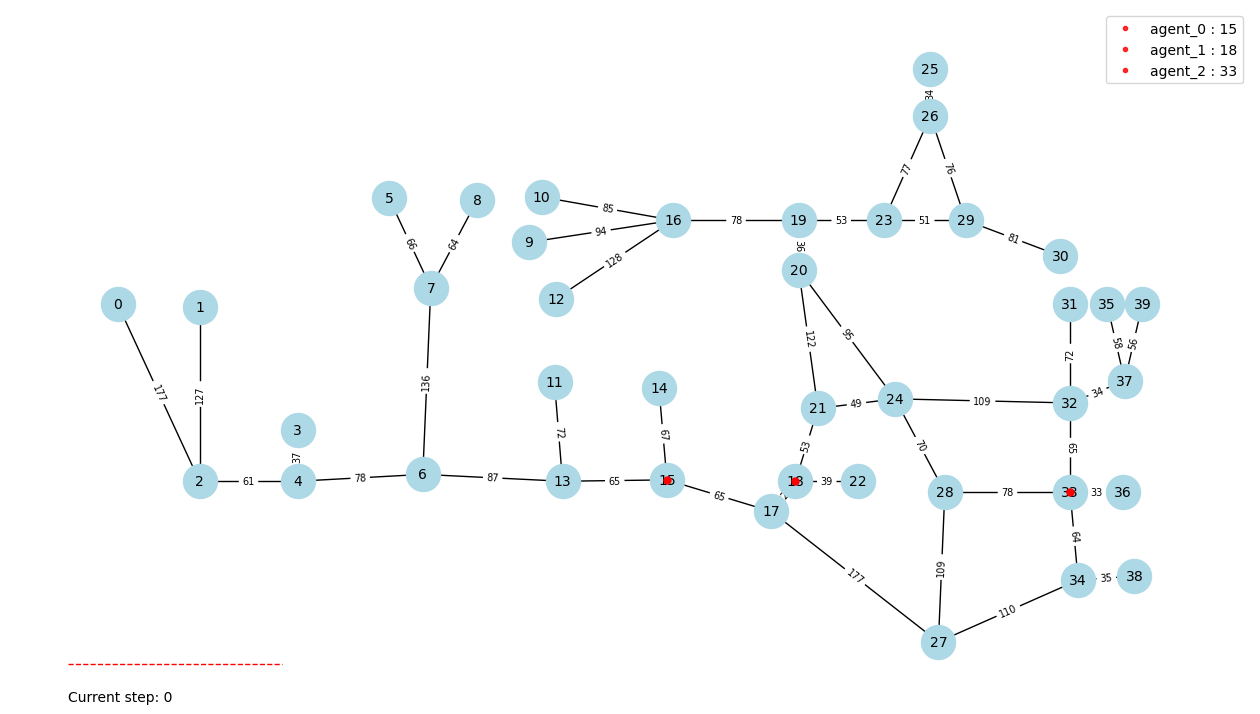

In [2]:
G = PatrolGraph("patrolling_zoo/env/cumberland.graph")
env = GraphPatrolEnv(G.graph, 3)
env.render()

In [3]:
print("agents : ", env.agents)
print("agents positions : ", env.agentPosition)
print("next node : ", env.next_node)
print("remaining steps : ", env.remaining_steps)

print("\nidle time : ", env.idle_time)

agents :  ['agent_0', 'agent_1', 'agent_2']
agents positions :  {'agent_0': 15, 'agent_1': 18, 'agent_2': 33}
next node :  {'agent_0': None, 'agent_1': None, 'agent_2': None}
remaining steps :  {'agent_0': 0, 'agent_1': 0, 'agent_2': 0}

idle time :  {0: 0, 2: 0, 1: 0, 4: 0, 3: 0, 6: 0, 5: 0, 7: 0, 13: 0, 8: 0, 9: 0, 16: 0, 10: 0, 11: 0, 12: 0, 15: 0, 14: 0, 17: 0, 19: 0, 27: 0, 18: 0, 21: 0, 22: 0, 20: 0, 23: 0, 24: 0, 26: 0, 29: 0, 32: 0, 28: 0, 25: 0, 34: 0, 33: 0, 30: 0, 31: 0, 37: 0, 36: 0, 38: 0, 35: 0, 39: 0}


In [20]:
env.step({"agent_0": 0})



In [22]:
env.observe("agent_0")

{'agents': [('agent_1', 18)], 'entities': []}

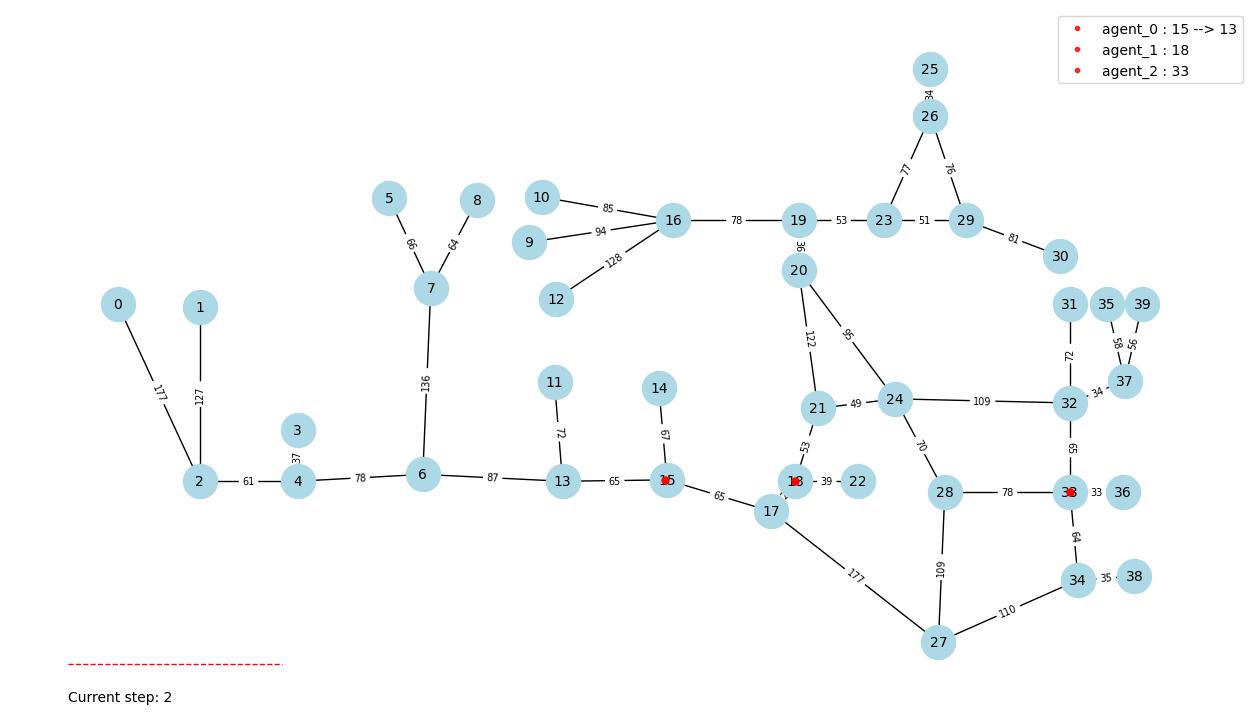

In [21]:
env.render()

In [73]:
def get_agent_matrix(env):
    # Initialize a zero matrix
    agent_matrix = np.zeros((len(env.possible_actions), len(env.agents)))

    # Loop over the agents
    for i, agent in enumerate(env.agents):
        # Get the current agent's position
        pos = env.agentPosition[agent]

        # If the agent is transitioning, pos would be a tuple
        if isinstance(pos, tuple):
            # Agent is transitioning to pos[1]
            dist = env.graph.edges[pos[0], pos[1]]['weight']
            agent_matrix[pos[1], i] = (dist - env.remaining_steps[agent])/dist
            print((dist - env.remaining_steps[agent])/dist)
        else:
            # Agent is at a vertex
            agent_matrix[pos, i] = 1
    return agent_matrix


In [67]:
env.agents

['agent_0', 'agent_1', 'agent_2']

In [34]:
import numpy as np

In [101]:
get_agent_matrix(env)

0.676923076923077


array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.67692308, 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.

In [109]:
list(env.idle_time.values())

[45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 0,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 0,
 45,
 45,
 45,
 45,
 45,
 45,
 45]